In [38]:
import pandas as pd
import os
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# 데이터셋 불러오기
df_netflix = pd.read_csv("../Netflix_dataset/titles.csv")
df_hbo = pd.read_csv("../HBO_dataset/titles.csv")
df_apple = pd.read_csv("../AppleTV_dataset/titles.csv")
df_disney = pd.read_csv("../Disney_dataset/titles.csv")
df_paramount = pd.read_csv("../Paramount_dataset/titles.csv")
df_amazon = pd.read_csv("../Amazon_dataset/titles.csv")


In [54]:
# import re

# # genre 열의 데이터를 쉼표를 기준으로 분리하여 알파벳만 남긴 문자열로 변환하여 합집합 만들기
# genres = set()
# for genre_list in df_netflix['genres']:
#     if pd.notnull(genre_list):
#         genres.update(re.findall(r'[a-zA-Z]+', genre_list))


# # 보기 쉽게 알파벳 순 정렬
# genres = sorted(list(genres))

        
# # 각 문자열의 빈도수 계산
# genre_counts = {genre: 0 for genre in genres}
# for genre_list in df_netflix['genres']:
#     if pd.notnull(genre_list):
#         for genre in re.findall(r'[a-zA-Z]+', genre_list):
#             genre = genre.lower()
#             genre_counts[genre] += 1
            
# genre_counts

In [53]:
# 데이터셋 파일명과 경로
dataset_files = [
    "../Netflix_dataset/titles.csv",
    "../HBO_dataset/titles.csv",
    "../AppleTV_dataset/titles.csv",
    "../Disney_dataset/titles.csv",
    "../Paramount_dataset/titles.csv",
    "../Amazon_dataset/titles.csv"
]


# OTT 플랫폼 목록
platforms = ['Netflix', 'HBO', 'Disney', 'AppleTV', 'Paramount', 'AmazonPrime']

# 모든 데이터를 담을 빈 데이터프레임 생성
merged_data = pd.DataFrame()

# 각 OTT 플랫폼의 데이터셋을 읽어와 이진 속성 추가 후 병합
for i, file in enumerate(dataset_files):
    # 데이터셋 파일 읽기
    dataset = pd.read_csv(file)
    
    # 'id' 속성을 가지고 있는지 여부를 나타내는 이진 속성 추가
    dataset[f'Is{platforms[i]}'] = dataset['id'].apply(lambda x: 1 if x in dataset['id'].values else 0)
    
    # 데이터프레임 병합
    merged_data = pd.concat([merged_data, dataset])

# 결과 확인
# print(merged_data.head())

merged_data

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,IsNetflix,IsHBO,IsDisney,IsAppleTV,IsParamount,IsAmazonPrime
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,...,NaN,NaN,0.601,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",['US'],NaN,...,8.1,588100.0,106.361,7.782,1.0,NaN,NaN,NaN,NaN,NaN
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",['US'],NaN,...,7.2,283316.0,33.160,7.406,1.0,NaN,NaN,NaN,NaN,NaN
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,"['crime', 'drama', 'comedy', 'music']",['US'],NaN,...,8.3,266738.0,24.616,8.020,1.0,NaN,NaN,NaN,NaN,NaN
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,"['drama', 'sport']",['US'],NaN,...,7.3,216307.0,75.699,7.246,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10868,tm1292884,Hunt,MOVIE,"Arjun is the ACP of Hyderabad, who gets involv...",2023,NaN,129,"['action', 'thriller', 'crime']",['IN'],NaN,...,5.8,1269.0,4.403,4.300,NaN,NaN,NaN,NaN,NaN,1.0
10869,tm1284753,Ennalum Ente Aliya,MOVIE,It tells the story of a teen girl from a Musli...,2023,NaN,113,"['drama', 'comedy']",['IN'],NaN,...,5.6,812.0,3.406,8.000,NaN,NaN,NaN,NaN,NaN,1.0
10870,tm1303380,Anubhav Singh Bassi: Bas Kar Bassi,MOVIE,"Fresh out of national law university, Bassi ar...",2023,NaN,83,['comedy'],[],NaN,...,8.3,10.0,1.960,NaN,NaN,NaN,NaN,NaN,NaN,1.0
10871,tm1307408,Pinkfong! Summer in Wonderville,MOVIE,It’s a hot summer day in Wonderville! Let’s jo...,2023,NaN,47,[],[],NaN,...,NaN,NaN,1.336,NaN,NaN,NaN,NaN,NaN,NaN,1.0


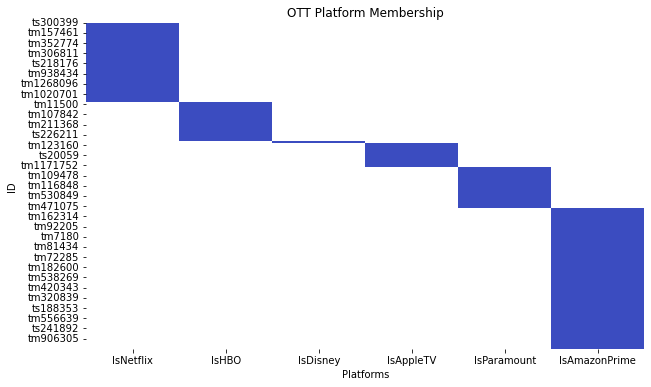

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 'id' 열을 인덱스로 설정합니다.
merged_data_2 = merged_data.set_index('id', inplace=False)

# 플랫폼 소속 열만 추출합니다.
platform_columns = ['IsNetflix', 'IsHBO', 'IsDisney', 'IsAppleTV', 'IsParamount', 'IsAmazonPrime']
platform_data = merged_data_2[platform_columns]

# 히트맵을 그립니다.
plt.figure(figsize=(10, 6))
sns.heatmap(platform_data, cmap='coolwarm', cbar=False)
plt.title('OTT Platform Membership')
plt.xlabel('Platforms')
plt.ylabel('ID')
plt.show()


In [41]:
import pandas as pd

# 'id'를 기준으로 그룹화하여 플랫폼 소속을 확인합니다.
grouped_data = merged_data.groupby('id')[['IsNetflix', 'IsHBO', 'IsDisney', 'IsAppleTV', 'IsParamount', 'IsAmazonPrime']].sum()

# 각 id별로 소속 플랫폼 개수를 계산합니다.
platform_count = grouped_data.sum(axis=1)


In [42]:
platform_count

id
tm1          1.0
tm10         1.0
tm10000      1.0
tm100001     2.0
tm1000022    1.0
            ... 
ts99534      1.0
ts99535      1.0
ts99814      1.0
ts9986       1.0
ts99878      1.0
Length: 23357, dtype: float64

In [43]:
# 소속 플랫폼 개수가 1인 경우
single_platform = platform_count[platform_count == 1]

# 결과 확인
print(single_platform)

id
tm1          1.0
tm10         1.0
tm10000      1.0
tm1000022    1.0
tm1000037    1.0
            ... 
ts99534      1.0
ts99535      1.0
ts99814      1.0
ts9986       1.0
ts99878      1.0
Length: 21487, dtype: float64


In [44]:
# 소속 플랫폼 개수가 1보다 큰 경우, 여러 플랫폼에 속하는 경우로 간주합니다.
multiple_platforms = platform_count[platform_count > 1]

# 결과 확인
print(multiple_platforms)

id
tm100001     2.0
tm1000619    2.0
tm100065     2.0
tm1000711    2.0
tm1001751    2.0
            ... 
ts911        2.0
ts9142       2.0
ts95569      3.0
ts95803      2.0
ts9583       2.0
Length: 1870, dtype: float64


In [45]:
# 소속 플랫폼 개수가 2보다 큰 경우
multiple_platforms = platform_count[platform_count > 2]

# 결과 확인
print(multiple_platforms)

id
tm11359     3.0
tm131198    3.0
tm136321    3.0
tm137977    3.0
tm138416    3.0
tm140433    3.0
tm142928    3.0
tm149432    3.0
tm155460    3.0
tm2838      3.0
tm48779     3.0
tm52327     3.0
tm69975     3.0
tm74188     3.0
tm82169     3.0
ts17942     3.0
ts21321     3.0
ts321614    3.0
ts95569     3.0
dtype: float64


In [46]:
merged_data

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,IsNetflix,IsHBO,IsDisney,IsAppleTV,IsParamount,IsAmazonPrime
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,...,NaN,NaN,0.601,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",['US'],NaN,...,8.1,588100.0,106.361,7.782,1.0,NaN,NaN,NaN,NaN,NaN
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",['US'],NaN,...,7.2,283316.0,33.160,7.406,1.0,NaN,NaN,NaN,NaN,NaN
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,"['crime', 'drama', 'comedy', 'music']",['US'],NaN,...,8.3,266738.0,24.616,8.020,1.0,NaN,NaN,NaN,NaN,NaN
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,"['drama', 'sport']",['US'],NaN,...,7.3,216307.0,75.699,7.246,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10868,tm1292884,Hunt,MOVIE,"Arjun is the ACP of Hyderabad, who gets involv...",2023,NaN,129,"['action', 'thriller', 'crime']",['IN'],NaN,...,5.8,1269.0,4.403,4.300,NaN,NaN,NaN,NaN,NaN,1.0
10869,tm1284753,Ennalum Ente Aliya,MOVIE,It tells the story of a teen girl from a Musli...,2023,NaN,113,"['drama', 'comedy']",['IN'],NaN,...,5.6,812.0,3.406,8.000,NaN,NaN,NaN,NaN,NaN,1.0
10870,tm1303380,Anubhav Singh Bassi: Bas Kar Bassi,MOVIE,"Fresh out of national law university, Bassi ar...",2023,NaN,83,['comedy'],[],NaN,...,8.3,10.0,1.960,NaN,NaN,NaN,NaN,NaN,NaN,1.0
10871,tm1307408,Pinkfong! Summer in Wonderville,MOVIE,It’s a hot summer day in Wonderville! Let’s jo...,2023,NaN,47,[],[],NaN,...,NaN,NaN,1.336,NaN,NaN,NaN,NaN,NaN,NaN,1.0


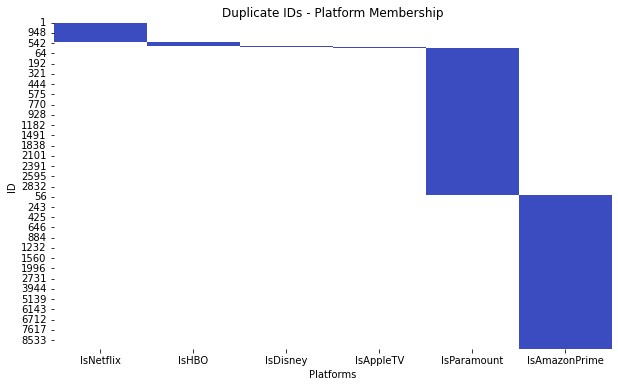

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 중복되는 행을 가진 id를 추출합니다.
duplicate_ids = merged_data[merged_data.duplicated('id', keep=False)]['id']

# 중복되는 행을 가진 id를 기준으로 플랫폼 소속을 확인합니다.
platform_columns = ['IsNetflix', 'IsHBO', 'IsDisney', 'IsAppleTV', 'IsParamount', 'IsAmazonPrime']
platform_data = merged_data[merged_data['id'].isin(duplicate_ids)][platform_columns]

# 히트맵을 그립니다.
plt.figure(figsize=(10, 6))
sns.heatmap(platform_data, cmap='coolwarm', cbar=False)
plt.title('Duplicate IDs - Platform Membership')
plt.xlabel('Platforms')
plt.ylabel('ID')
plt.show()


In [52]:
# 1개라도 겹치는 id (2개 이상 플랫폼에 속한 영상의 id)
duplicate_ids

1          tm82169
2          tm17823
4          tm69975
36       tm1217553
37        tm140433
           ...    
10298     tm819325
10407     tm995756
10496     tm534294
10614     tm479766
10634     tm973698
Name: id, Length: 3759, dtype: object

-> 결과가 이상하게 나옴..

In [ ]:
# OTT 별 겹치는 값 개수 세기


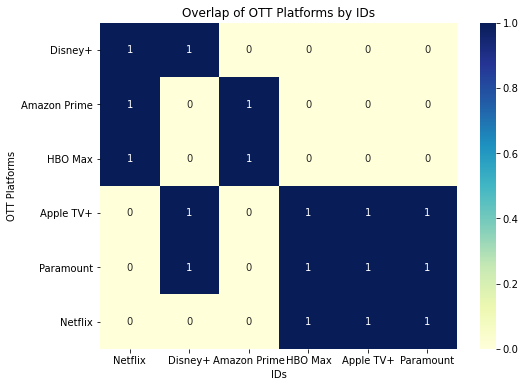

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터셋 생성
data = {
    'Netflix': [1, 1, 1, 0, 0, 0],
    'Disney+': [1, 0, 0, 1, 1, 0],
    'Amazon Prime': [0, 1, 1, 0, 0, 0],
    'HBO Max': [0, 0, 0, 1, 1, 1],
    'Apple TV+': [0, 0, 0, 1, 1, 1],
    'Paramount': [0, 0, 0, 1, 1, 1]
}

# 데이터프레임 생성
df = pd.DataFrame(data, index=['Disney+', 'Amazon Prime', 'HBO Max', 'Apple TV+','Paramount', 'Netflix'])

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap='YlGnBu')
plt.xlabel('IDs')
plt.ylabel('OTT Platforms')
plt.title('Overlap of OTT Platforms by IDs')
plt.show()
